# Exercise 2
## Cleaning the data

Now we have the data downloaded. We can will have to clean the data so that it is appropriate for training.

In [1]:
%matplotlib inline
import pandas as pd
data = pd.read_csv('data/OSI_feats.csv')

In [2]:
data.head(n=20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False


Numerical column
- Administrative
- Administritive_Duration
- Informational
- Informational_Duration
- ProductRelated
- ProductRelated_Duration
- BounceRates
- ExitRates
- PageValues
- SpecialDay
- OperatingSystems
- Browser
- Region
- TrafficType

Binary columns
- Weekend

Categorical columns to convert to dummy columns
- Month
- VisitorType

We can use the `describe` function to examine some properties of the numerical column

In [3]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


We can also look at the distribution of numerical values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x102f22438>,
      dtype=object)

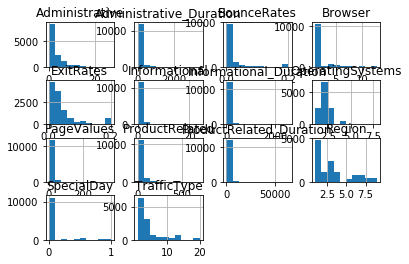

In [4]:
data.select_dtypes(include=['int64', 'float64']).hist()

### Converting non-numercal columns to numerical

#### Binary columns

Convert 'default' column to binary, rename to 'is_default'

In [5]:
data['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

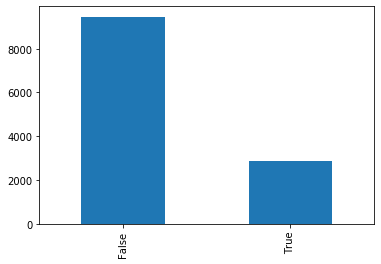

In [6]:
data['Weekend'].value_counts().plot(kind='bar')

We can see that there more false values of `Weekend` than true values. We will convert the boolean value to integer

In [7]:
data['is_weekend'] = data['Weekend'].apply(lambda row: 1 if row == True else 0)

Let's look at the two columns side-by-side to get an understanding

In [8]:
data[['Weekend', 'is_weekend']].tail()

,Weekend,is_weekend
12325,True,1
12326,True,1
12327,True,1
12328,False,0
12329,True,1


### Categorical columns
The other columns are categorical so we will have to deal with them a little differently.

In [9]:
data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

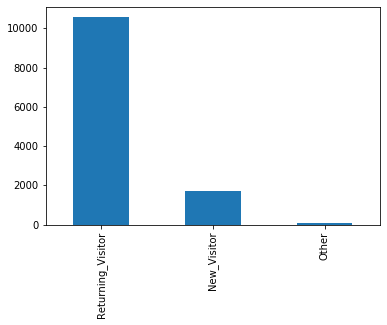

In [10]:
data['VisitorType'].value_counts().plot(kind='bar')

We can see that there are three options for the `VisitorType` column, so we will make this a categorical column.

We can do this using the `get_dummies` function in the pandas library

In [11]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.reshape:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
    Convert categorical variable into dummy/indicator variables.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix`.
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
    columns : list-like, default None
        Column names in the

In [12]:
colname = 'VisitorType'
visitor_type_dummies = pd.get_dummies(data[colname], prefix=colname)
pd.concat([data[colname], visitor_type_dummies], axis=1).tail(n=10)

,VisitorType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
12320,Returning_Visitor,0,0,1
12321,Returning_Visitor,0,0,1
12322,Returning_Visitor,0,0,1
12323,Returning_Visitor,0,0,1
12324,Returning_Visitor,0,0,1
12325,Returning_Visitor,0,0,1
12326,Returning_Visitor,0,0,1
12327,Returning_Visitor,0,0,1
12328,Returning_Visitor,0,0,1
12329,New_Visitor,1,0,0


We can see that there is a bit of redundant information here, we have three total options, but we know that whenever two of the columns are zero, the other column *has* to be 1, since everyone has to fall into one of the three options. We can then drop one of the columns and assume that a zero in the remaining columns means that the dropped column is equal to one.

Here we will drop the `VisitorType_Other` column since it occurs with the least frequency.

In [13]:
visitor_type_dummies.drop('VisitorType_Other', axis=1, inplace=True)

In [14]:
visitor_type_dummies.head()

,VisitorType_New_Visitor,VisitorType_Returning_Visitor
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Now we will join it back to the original dataset

In [15]:
data = pd.concat([data, visitor_type_dummies], axis=1)

Let's do the same for the `Month` column

In [16]:
data['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

Here we will drop the month of February since it occurs with the lowest frequency.

In [17]:
colname = 'Month'
month_dummies = pd.get_dummies(data[colname], prefix=colname)
month_dummies.drop(colname+'_Feb', axis=1, inplace=True)

In [18]:
data = pd.concat([data, month_dummies], axis=1)

In [19]:
data.iloc[0]

Administrative                                   0
Administrative_Duration                          0
Informational                                    0
Informational_Duration                           0
ProductRelated                                   1
ProductRelated_Duration                          0
BounceRates                                    0.2
ExitRates                                      0.2
PageValues                                       0
SpecialDay                                       0
Month                                          Feb
OperatingSystems                                 1
Browser                                          1
Region                                           1
TrafficType                                      1
VisitorType                      Returning_Visitor
Weekend                                      False
is_weekend                                       0
VisitorType_New_Visitor                          0
VisitorType_Returning_Visitor  

In [20]:
data.drop(['Weekend', 'VisitorType', 'Month'], axis=1, inplace=True, errors='ignore')

Let's check the data types to confirm that that the are all numerical

In [21]:
data.dtypes

Administrative                     int64
Administrative_Duration          float64
Informational                      int64
Informational_Duration           float64
ProductRelated                     int64
ProductRelated_Duration          float64
BounceRates                      float64
ExitRates                        float64
PageValues                       float64
SpecialDay                       float64
OperatingSystems                   int64
Browser                            int64
Region                             int64
TrafficType                        int64
is_weekend                         int64
VisitorType_New_Visitor            uint8
VisitorType_Returning_Visitor      uint8
Month_Aug                          uint8
Month_Dec                          uint8
Month_Jul                          uint8
Month_June                         uint8
Month_Mar                          uint8
Month_May                          uint8
Month_Nov                          uint8
Month_Oct       

While the data may not be the most appropriate form to train a model, we can techincally train the model with it.
Later on in the lesson we will tackle some more appropriate methods to represent the variables that will result in better model performance.

We will save the models to a csv file

In [22]:
data.to_csv('data/OSI_feats_e2.csv', index=False)

#### Target variable

We can do a similar task to the target variable by making all the columns into numerical data types.
We start by loading it in.

In [23]:
target = pd.read_csv('data/OSI_target.csv')
target.head(n=10)

,Revenue
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


This one should be easy since there's just one column, let's verify that there are only two options.

In [24]:
target['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

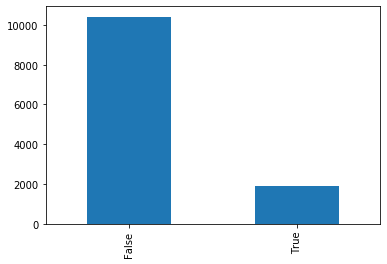

In [25]:
target['Revenue'].value_counts().plot(kind='bar')

In [26]:
target['Revenue'] = target['Revenue'].apply(lambda row: 1 if row == True else 0)
target.head(n=10)

,Revenue
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Save the target data to csv

In [27]:
target.to_csv('data/OSI_target_e2.csv', index=False)